The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [173]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [174]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [175]:
df.shape

(158, 12)

In [176]:
print("No.of rows in the dataset",df.shape[0])
print("No.of columns in the dataset",df.shape[1])

No.of rows in the dataset 158
No.of columns in the dataset 12


The Dataset Contains 158 rows and 12 columns where 11 are independent variables and 1 is target variable 

In [177]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

This dataset contains three types of data:float64,int64 and object

In [178]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

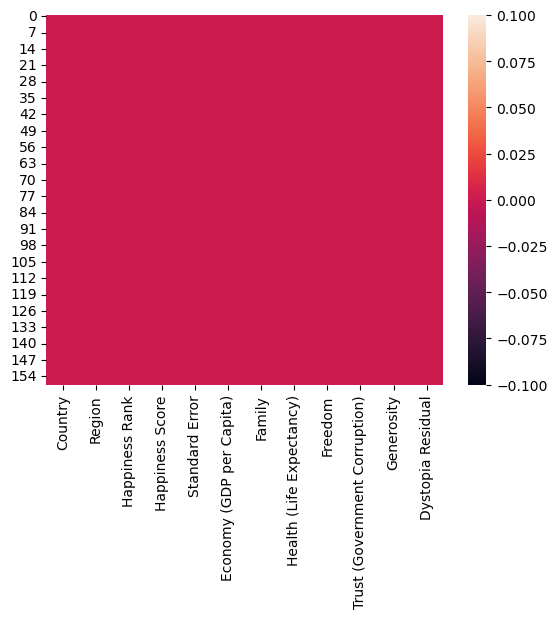

In [179]:
sns.heatmap(df.isnull())

From the above heatmap it is clear that there is no missing data present in our Dataset

In [180]:
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


Since the No.of Unique Values for target variable are 157 and the no of rows in the dataset are 158 which is very small gap so this problem can be considered as Regression problem 

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [182]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From the above we observe :
1.Since count is equal for all the columns so there are no null values present in the dataset 
2.The mean is less than median(50%)for Happiness Rank,Economy,Family,Health,Freedom so data is skewed to left for these columns
3.The mean is more than median(50%)for Happiness Score,Standard Error,Trust,Generosity,Dystopia Residual so data is skewed to right for these columns

In [183]:
df.duplicated().sum()

0

In [184]:
df1=df.drop(['Country','Region','Happiness Rank'],axis=1)

I have dropped these columns as they doesnt seem to be contributing in prediction of target variable 

Univarient Analysis

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


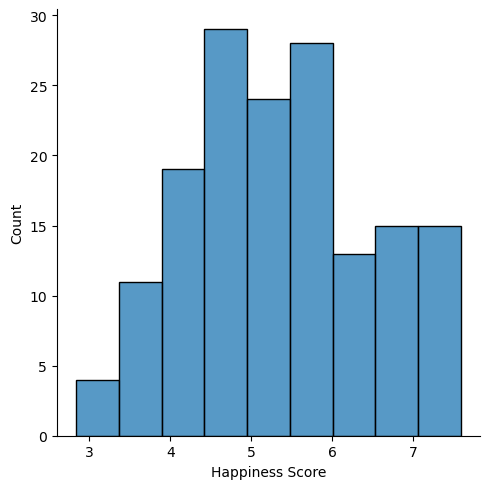

In [185]:
ax=sns.displot(x="Happiness Score",data=df1)
print(df["Happiness Score"].value_counts())

0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64


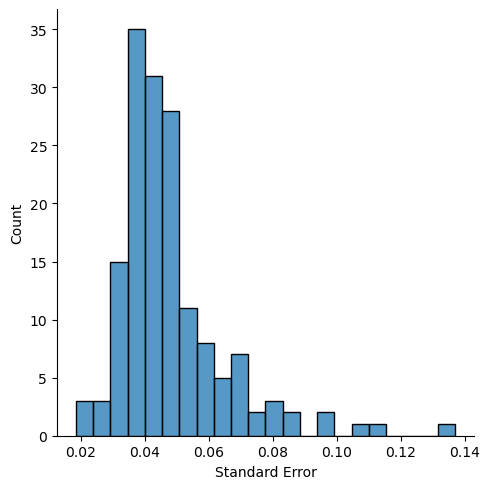

In [186]:
ax=sns.displot(x="Standard Error",data=df1)
print(df["Standard Error"].value_counts())

It is seen from the plot that Standard Error is higher in range approximately 0.03-0.05

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64


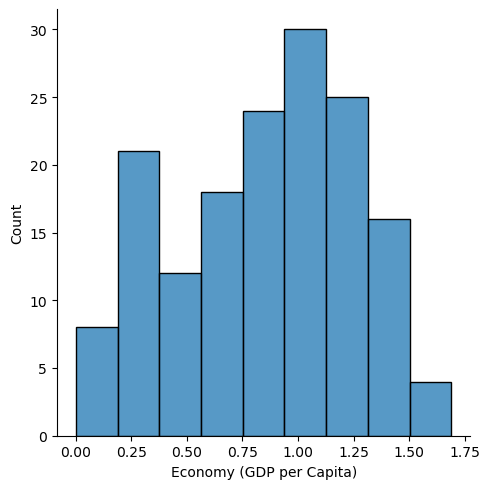

In [187]:
ax=sns.displot(x="Economy (GDP per Capita)",data=df1)
print(df["Economy (GDP per Capita)"].value_counts())

1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: Family, Length: 158, dtype: int64


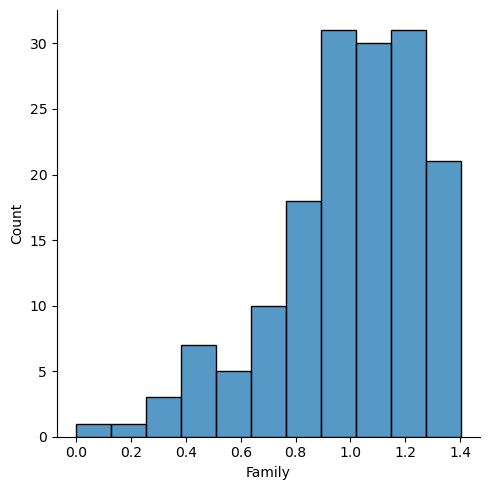

In [188]:
ax=sns.displot(x="Family",data=df1)
print(df["Family"].value_counts())

0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Health (Life Expectancy), Length: 157, dtype: int64


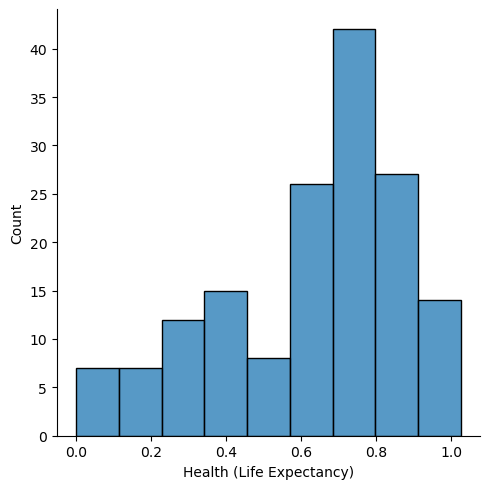

In [189]:
ax=sns.displot(x="Health (Life Expectancy)",data=df1)
print(df["Health (Life Expectancy)"].value_counts())

0.66557    1
0.40820    1
0.07699    1
0.33916    1
0.32112    1
          ..
0.51649    1
0.60855    1
0.21342    1
0.55475    1
0.36453    1
Name: Freedom, Length: 158, dtype: int64


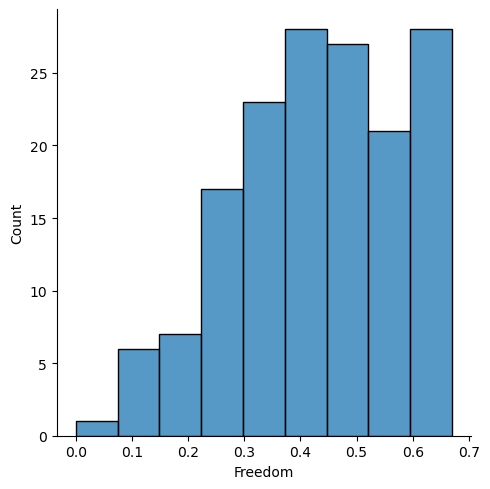

In [190]:
ax=sns.displot(x="Freedom",data=df1)
print(df["Freedom"].value_counts())

0.32524    2
0.07625    1
0.01397    1
0.04582    1
0.02758    1
          ..
0.03787    1
0.01031    1
0.19317    1
0.05989    1
0.10731    1
Name: Trust (Government Corruption), Length: 157, dtype: int64


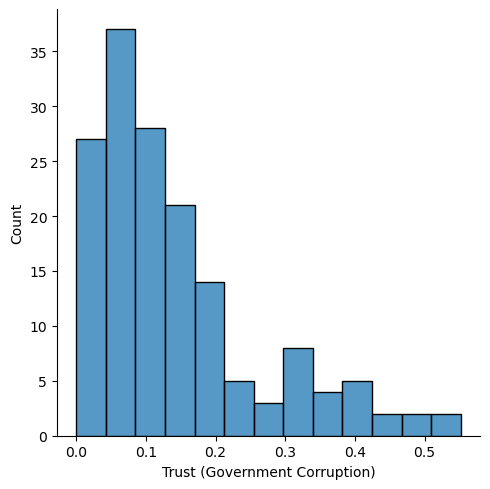

In [191]:
ax=sns.displot(x="Trust (Government Corruption)",data=df1)
print(df["Trust (Government Corruption)"].value_counts())

0.29678    1
0.21222    1
0.00000    1
0.21854    1
0.12800    1
          ..
0.11827    1
0.25328    1
0.02641    1
0.27815    1
0.16681    1
Name: Generosity, Length: 158, dtype: int64


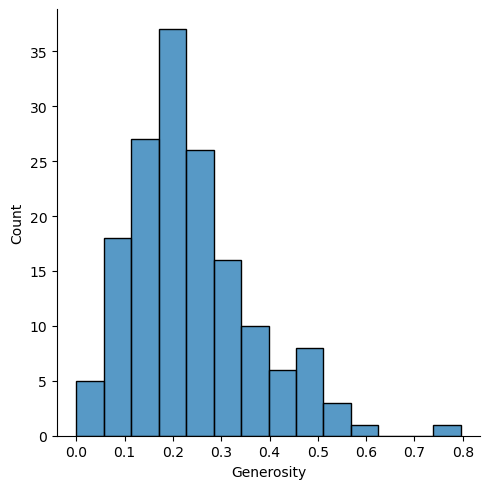

In [192]:
ax=sns.displot(x="Generosity",data=df1)
print(df["Generosity"].value_counts())

2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: Dystopia Residual, Length: 158, dtype: int64


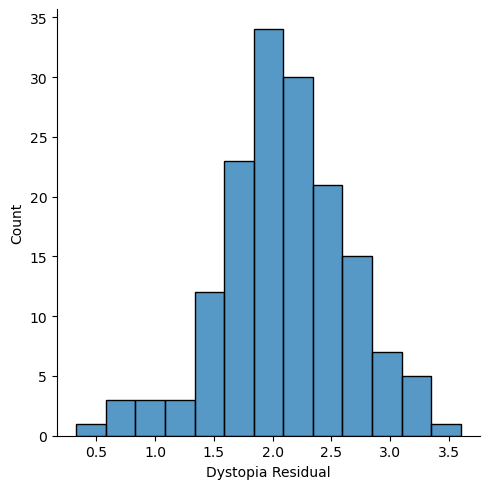

In [193]:
ax=sns.displot(x="Dystopia Residual",data=df1)
print(df["Dystopia Residual"].value_counts())

Bivarient Analysis

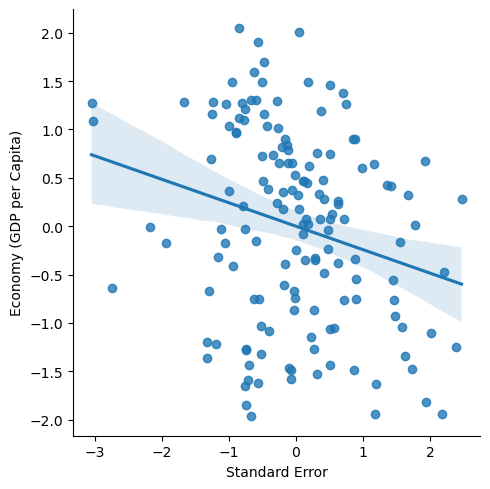

In [272]:
sns.lmplot(x="Standard Error",y="Economy (GDP per Capita)",data=df1,palette="colorblind")

From the plot we observe as the Standard Error Increases the Economy is decreasing also the best fit line doesnot have a linear relationship and most of the data points are scattered around rather than being on the best fit line

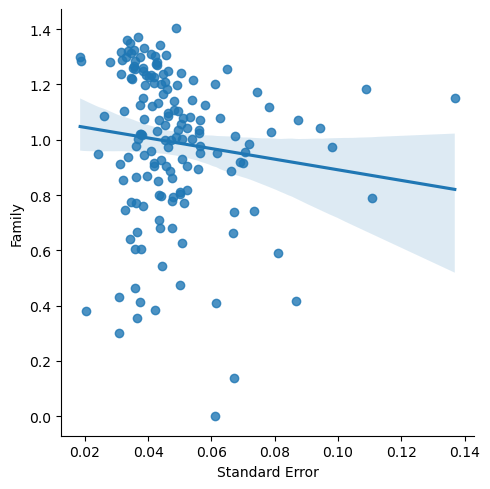

In [195]:
sns.lmplot(x="Standard Error",y="Family",data=df1,palette="colorblind")

From the above plot we observe Standard Error and Family have almost same values and there relationship is seeeming equal also data points are near to the fit line but still scattered around

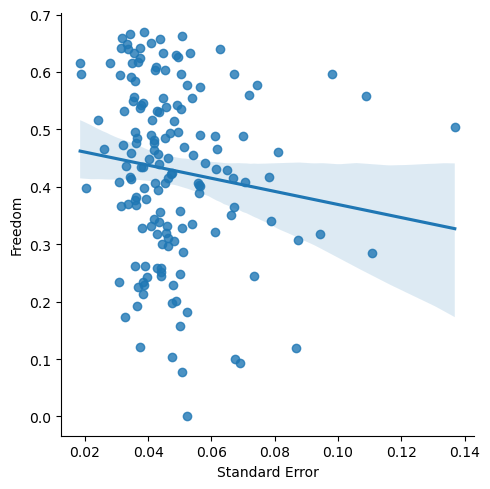

In [196]:
sns.lmplot(x="Standard Error",y="Freedom",data=df1,palette="colorblind")

From the above plot we observe Standard Error and Freedom have almost non-linear relationship also data points are near to the fit line but still scattered around

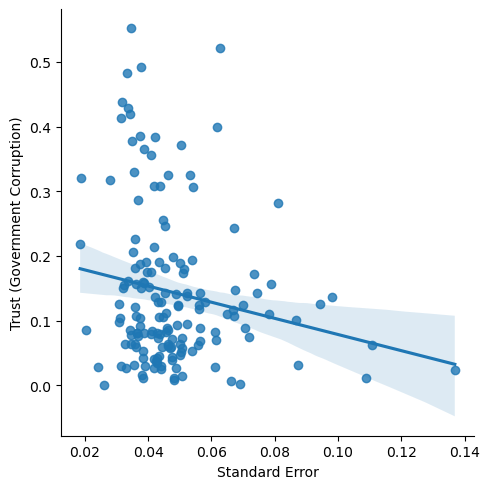

In [197]:
sns.lmplot(x="Standard Error",y="Trust (Government Corruption)",data=df1,palette="colorblind")

From the plot we observe as the Standard Error Increases the Trust is decreasing also the best fit line doesnot have a linear relationship and most of the data points are scattered around near than being on the best fit line

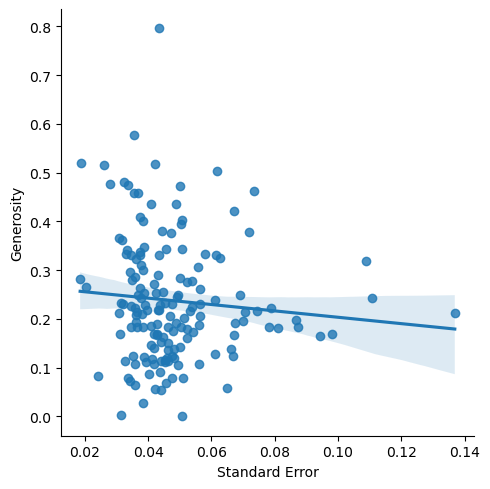

In [198]:
sns.lmplot(x="Standard Error",y="Generosity",data=df1,palette="colorblind")

From the above plot we observe Standard Error and Generosity have almost same values and there relationship is seeeming equal also data points are near to the fit line but still scattered around

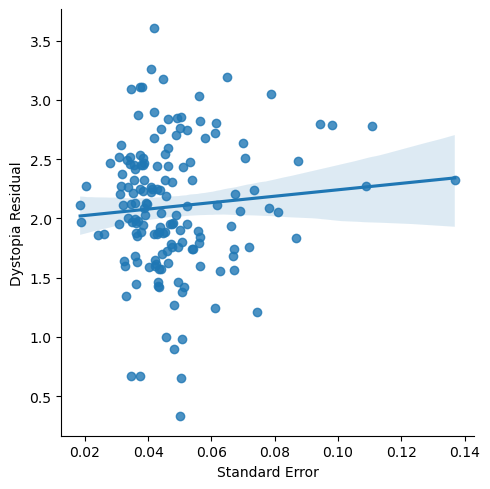

In [199]:
sns.lmplot(x="Standard Error",y="Dystopia Residual",data=df1,palette="colorblind")

From the above plot we observe Standard Error and Dystopia Residual have linear relationship as one is increasing the other is also increasing also data points are near to the fit line, less on the fit line and more scattered around

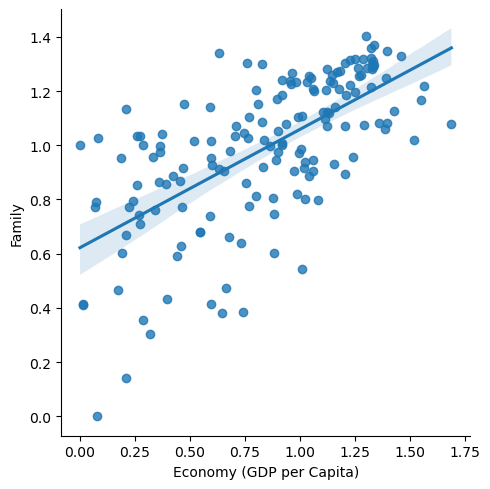

In [200]:
sns.lmplot(x="Economy (GDP per Capita)",y="Family",data=df1,palette="colorblind")

From the above plot we observe Economy and Family have linear relationship as one is increasing the other is also increasing also data points are near to the fit line, little more on the fit line and also scattered around

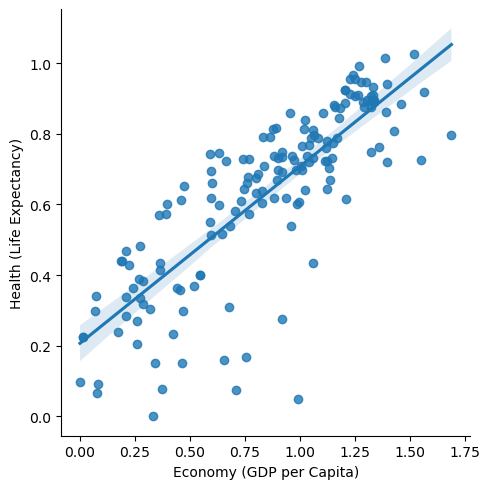

In [201]:
sns.lmplot(x="Economy (GDP per Capita)",y="Health (Life Expectancy)",data=df1,palette="colorblind")

From the above plot we observe Economy and Health have linear relationship as one is increasing the other is also increasing also data points are near to the fit line, little more on the fit line and also scattered around

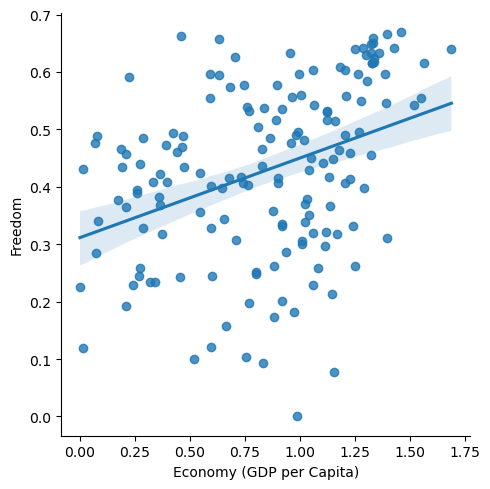

In [202]:
sns.lmplot(x="Economy (GDP per Capita)",y="Freedom",data=df1,palette="colorblind")

From the above plot we observe Economy and Freedom have linear relationship as one is increasing the other is also increasing also data points are near to the fit line, less on the fit line and also scattered around

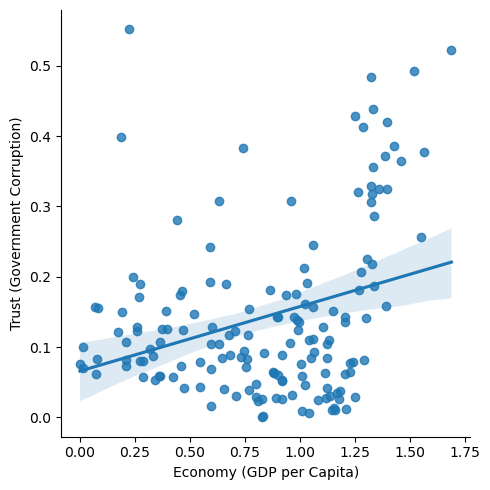

In [203]:
sns.lmplot(x="Economy (GDP per Capita)",y="Trust (Government Corruption)",data=df1,palette="colorblind")

From the above plot we observe Economy and Trust have linear relationship as one is increasing the other is also increasing also data points are more near to the fit line, less on the fit line and also scattered around

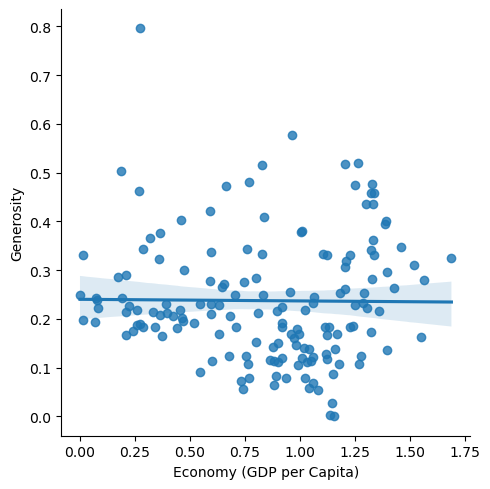

In [204]:
sns.lmplot(x="Economy (GDP per Capita)",y="Generosity",data=df1,palette="colorblind")

From the above plot we observe Economy and Generosity have almost same values and there relationship is seeeming equal also data points are near to the fit line but more scattered around

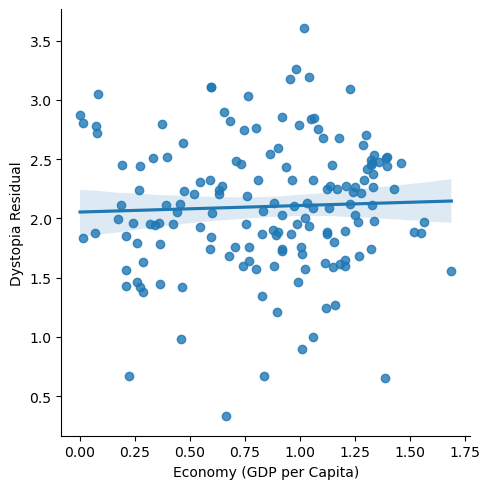

In [205]:
sns.lmplot(x="Economy (GDP per Capita)",y="Dystopia Residual",data=df1,palette="colorblind")

From the above plot we observe Economy and Dystopia Residual have almost same values and there relationship is seeeming equal also data points are near to the fit line but still scattered around

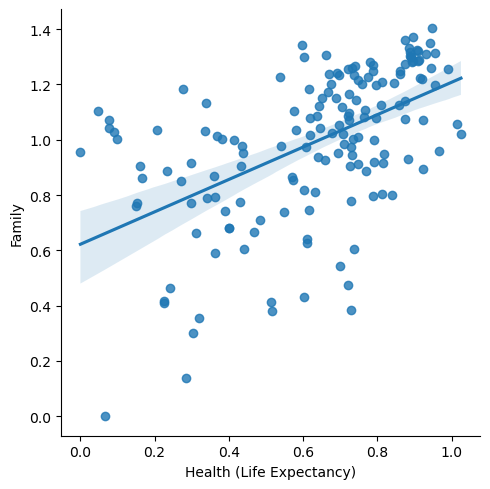

In [206]:
sns.lmplot(x="Health (Life Expectancy)",y="Family",data=df1,palette="colorblind")

From the above plot we observe H?ealth and Family have linear relationship as one is increasing the other is also increasing also data points are more near to the fit line, less on the fit line and also scattered around

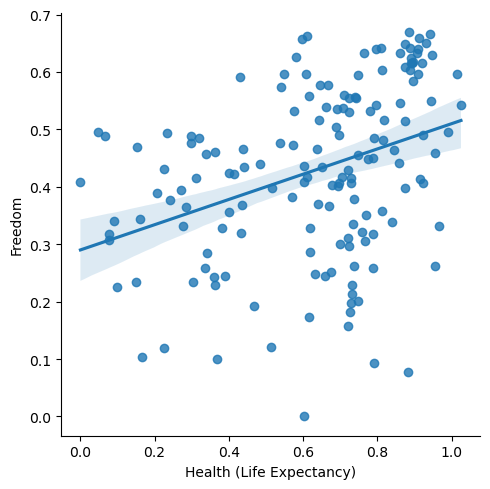

In [207]:
sns.lmplot(x="Health (Life Expectancy)",y="Freedom",data=df1,palette="colorblind")

From the above plot we observe Health and Freedom have linear relationship as one is increasing the other is also increasing also data points are more near to the fit line, less on the fit line and also scattered around

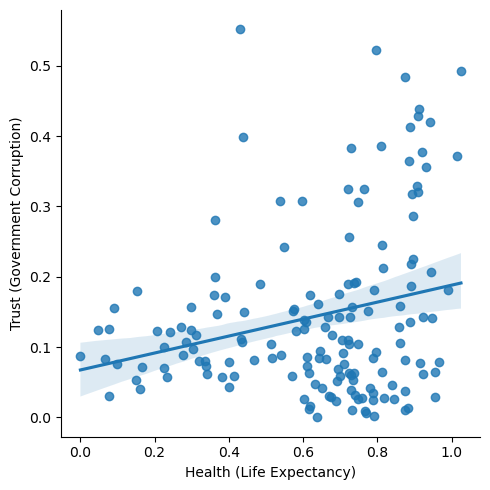

In [208]:
sns.lmplot(x="Health (Life Expectancy)",y="Trust (Government Corruption)",data=df1,palette="colorblind")

From the above plot we observe Health and Trust have linear relationship as one is increasing the other is also increasing also data points are more near to the fit line, less on the fit line and also scattered around

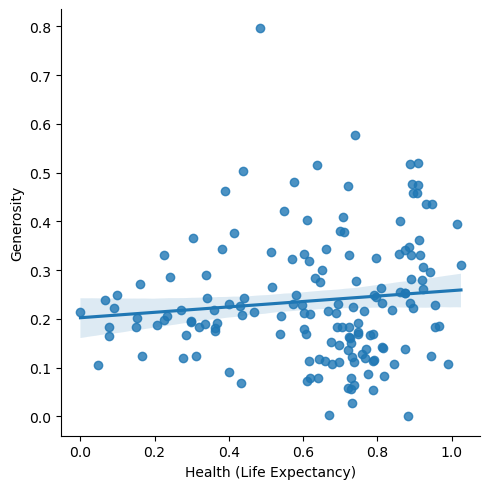

In [209]:
sns.lmplot(x="Health (Life Expectancy)",y="Generosity",data=df1,palette="colorblind")

From the above plot we observe Health and Generosity have somewhat equal relationship data points are more near to the fit line, less on the fit line and also scattered around

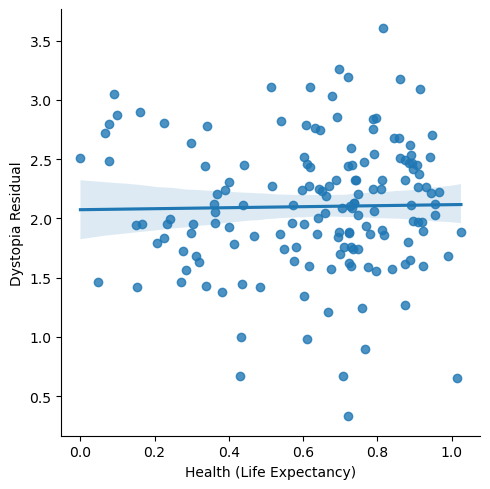

In [210]:
sns.lmplot(x="Health (Life Expectancy)",y="Dystopia Residual",data=df1,palette="colorblind")

From the above plot we observe Health and Dystopia Residual have somewhat equal relationship data points are more near to the fit line, less on the fit line and also scattered around

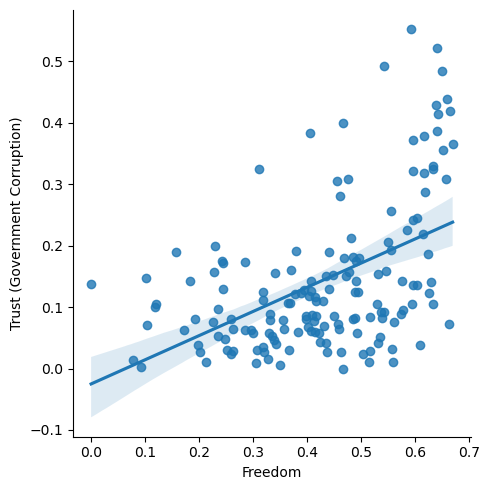

In [211]:
sns.lmplot(x="Freedom",y="Trust (Government Corruption)",data=df1,palette="colorblind")

From the above plot we observe Freedom and Trust have linear relationship data points are more near to the fit line, less on the fit line and also scattered around

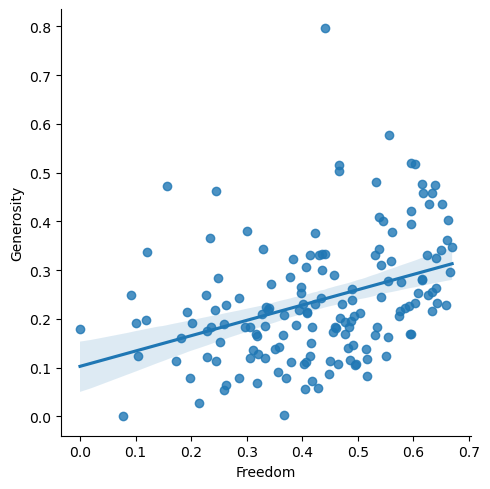

In [212]:
sns.lmplot(x="Freedom",y="Generosity",data=df1,palette="colorblind")

From the above plot we observe Freedom and Generosity have linear relationship data points are more near to the fit line, less on the fit line and also scattered around

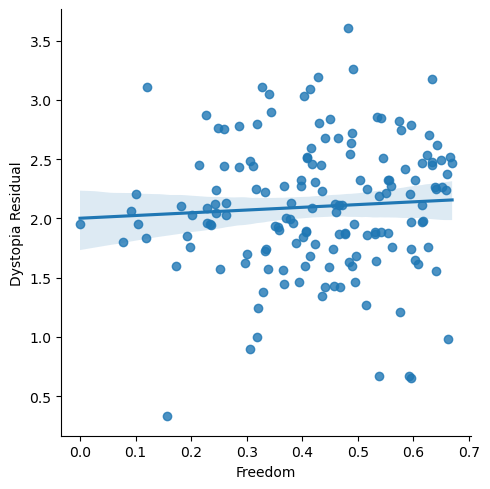

In [213]:
sns.lmplot(x="Freedom",y="Dystopia Residual",data=df1,palette="colorblind")

From the above plot we observe Freedom and Dystopia Residual have almost equal relationship data points are more near to the fit line, less on the fit line and also scattered around

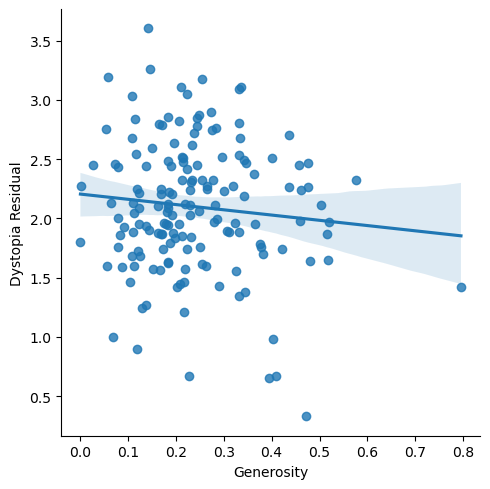

In [214]:
sns.lmplot(x="Generosity",y="Dystopia Residual",data=df1,palette="colorblind")

From the above plot we observe Generosity and Dystopia Residual have non-linear relationship data points are more near to the fit line, less on the fit line and also scattered around

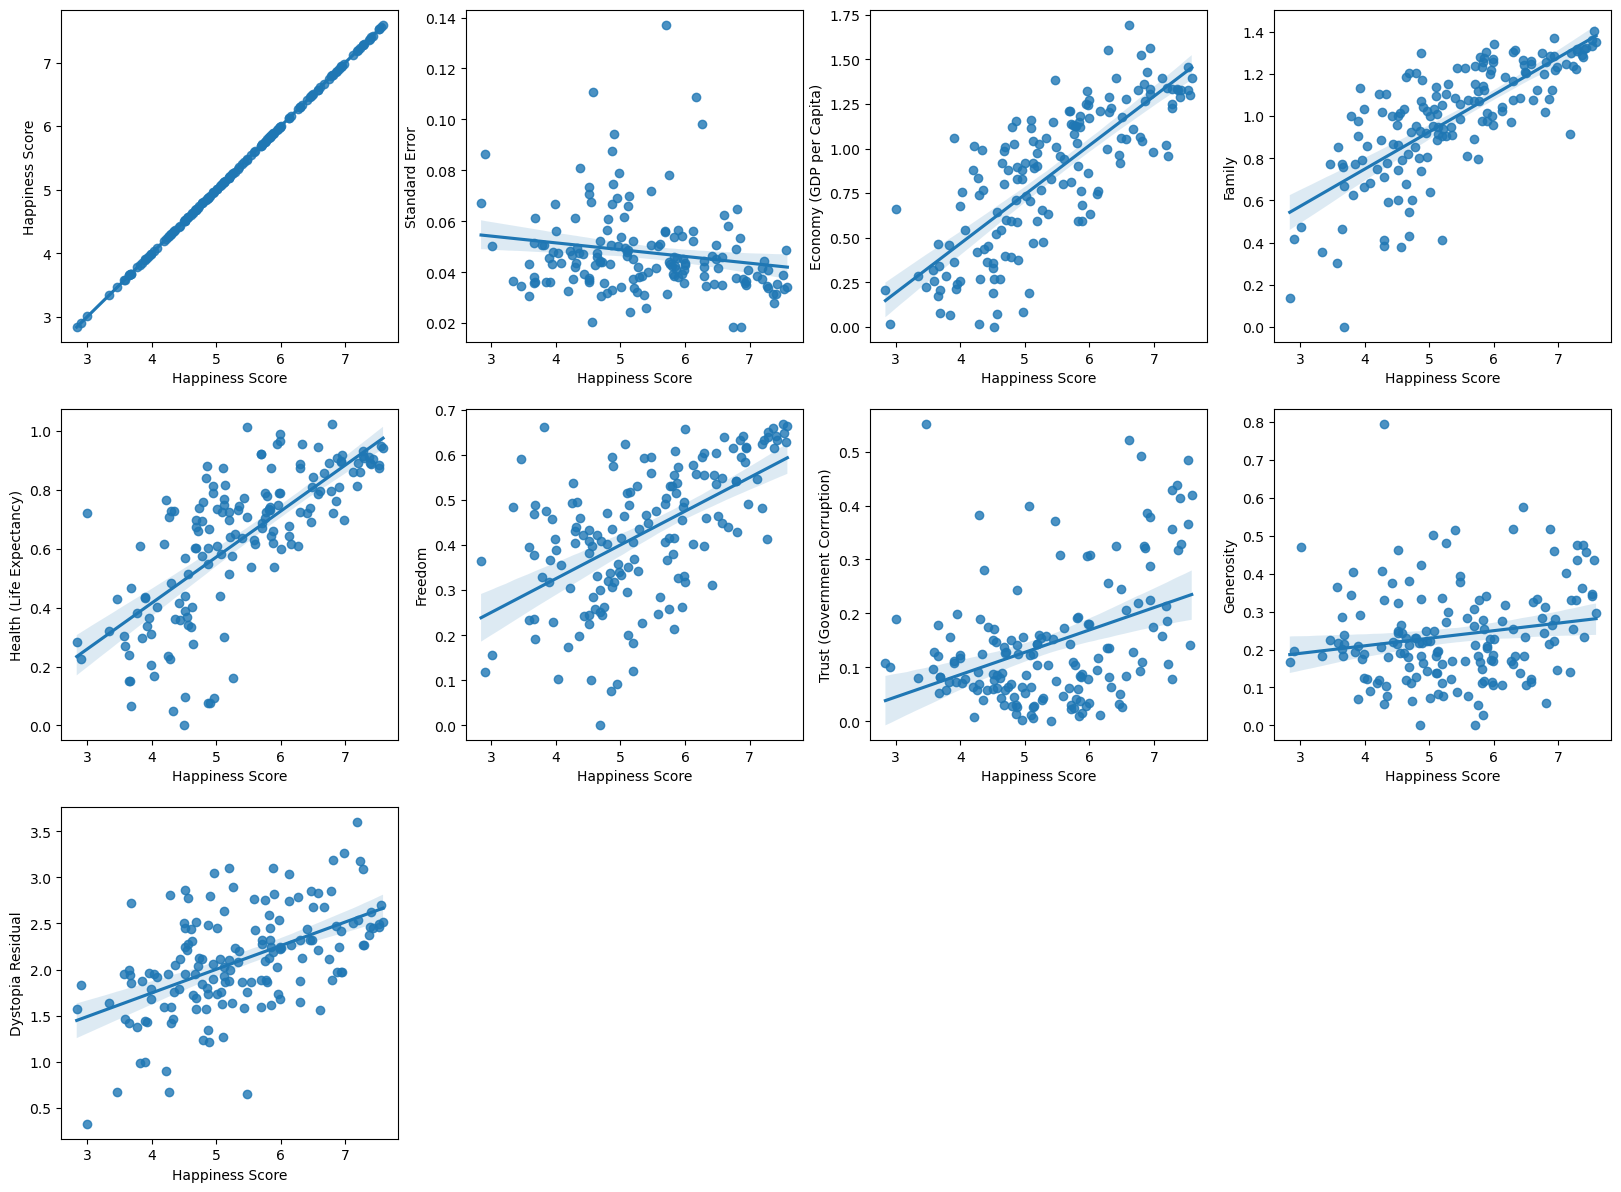

In [215]:
plt.figure(figsize=(20,25))
p=1
for i in df1:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x="Happiness Score",y=i,data=df1)
        plt.xlabel("Happiness Score")
        plt.ylabel(i)
    p+=1

plt.show()


From the above plot we can see how Happiness Score is having Linear Relationship with Economy,Family,Health,Freedom and Dystopia Residual and non_linear relationship with standard Error and almost equal relationship with Generosity

Multivarient Analysis

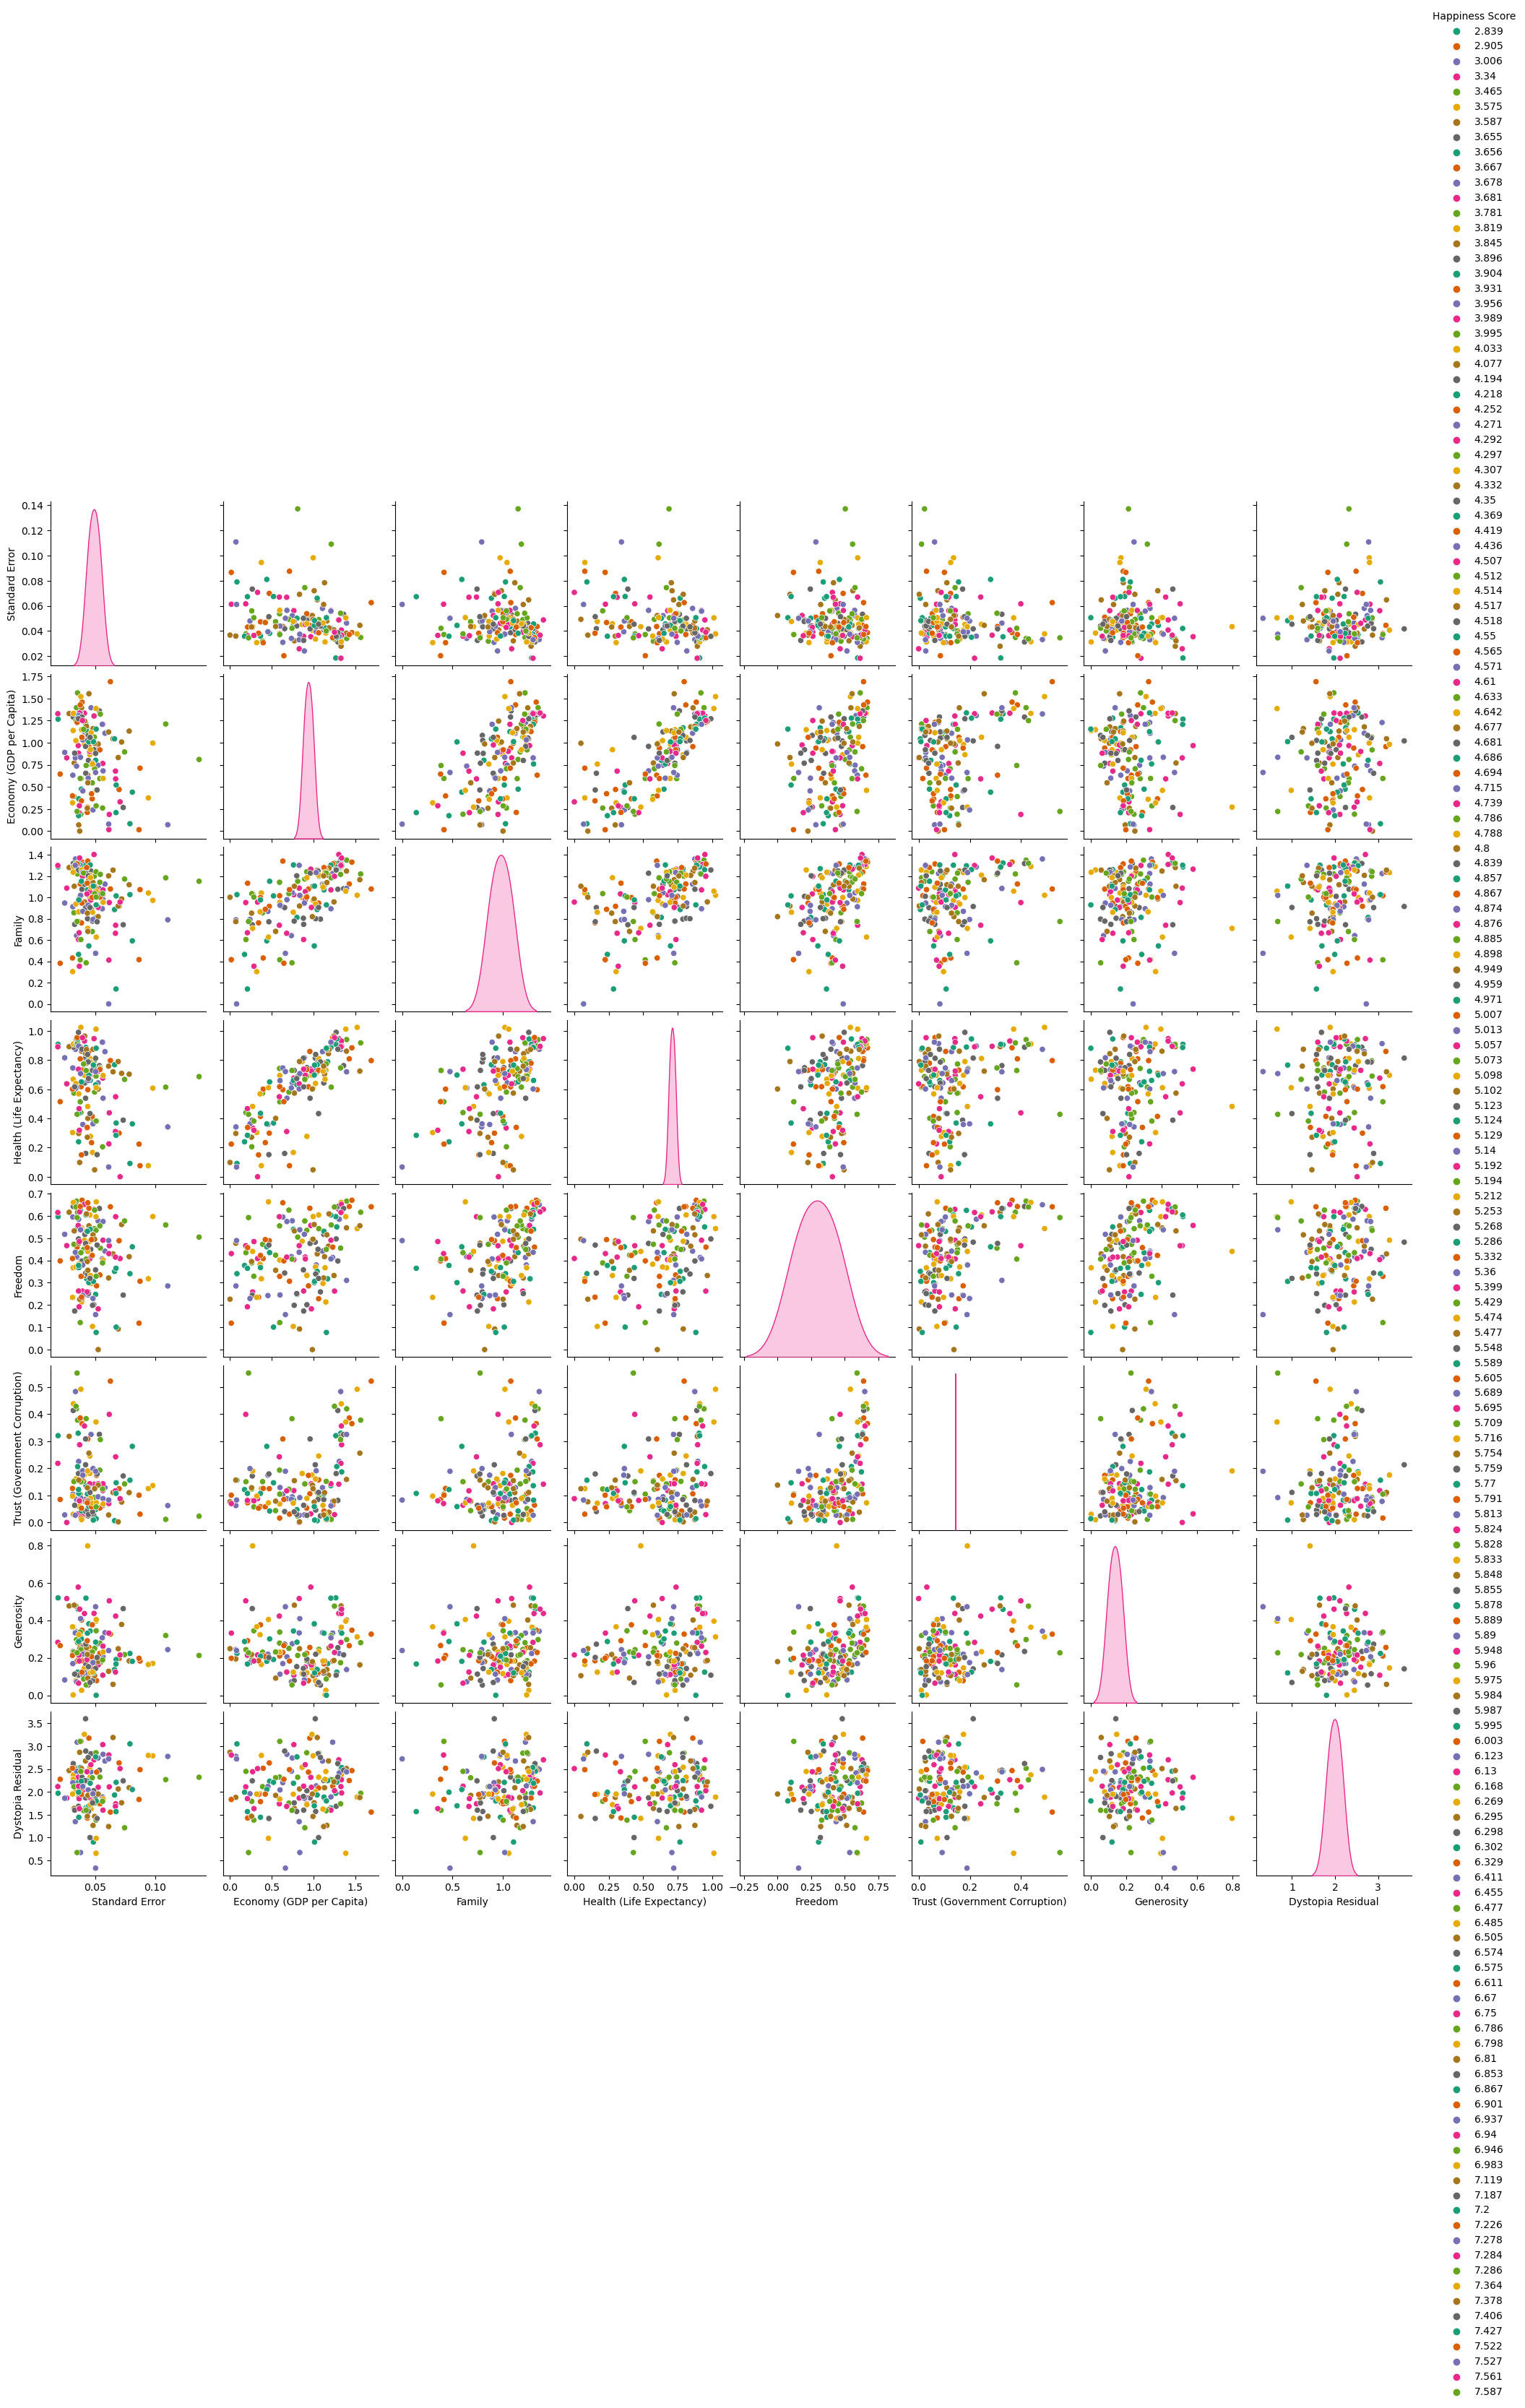

In [216]:
sns.pairplot(df1,hue="Happiness Score",palette="Dark2")
plt.show()

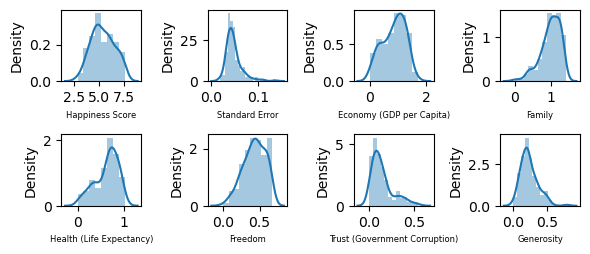

In [217]:
plt.figure(figsize = (6,6))
pltnumber = 1

for column in df1:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=6)
        pltnumber+=1
plt.tight_layout()

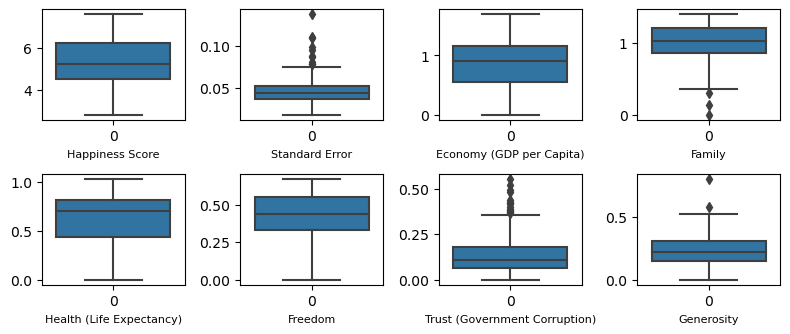

In [218]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in df1:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=8)
        pltnumber+=1
plt.tight_layout()

We can clearly see outliers present in Standard Error,Family,Trust and Generosity

In [219]:
from scipy.stats import zscore

z = np.abs(zscore(df1))
threshold = 3
df= df1[(z<3).all(axis = 1)]
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


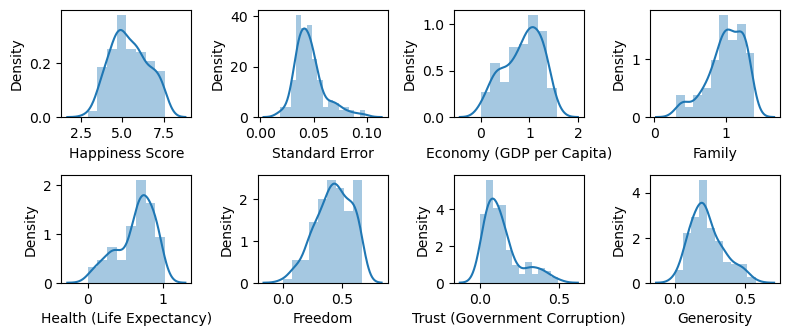

In [220]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in df:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Above we have applied Z-score method and tried removing outliers which can be seen in the graph above

In [221]:
data_loss=(158-149)/158*100
data_loss

5.69620253164557

In [222]:
df.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

From the skew() method we can see certain columns that are not in the acceptable range of -0.5 to 0.5,that indicates that we have outliers present in our dataset

In [223]:
from sklearn.preprocessing import power_transform
df1= power_transform(df, method ='yeo-johnson')
df1= pd.DataFrame(df1,columns=df.columns)

In [224]:
df1.skew()

Happiness Score                 -0.017940
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

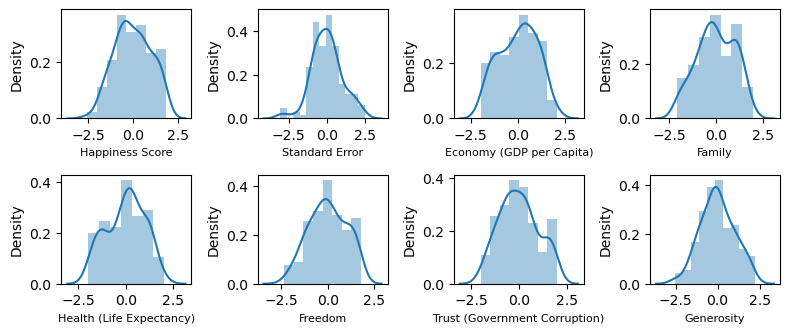

In [225]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in df1:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=8)
        pltnumber+=1
plt.tight_layout()

We have removed skewness and it is clear in the above plot

In [227]:
cor=df1.corr()
cor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.230049,0.783572,0.752671,0.759114,0.592423,0.385794,0.217238,0.527450
Standard Error,-0.230049,1.000000,-0.242604,-0.187401,-0.320227,-0.214190,-0.109699,-0.137493,0.013555
Economy (GDP per Capita),0.783572,-0.242604,1.000000,0.651183,0.843714,0.411491,0.273357,0.008528,0.030794
Family,0.752671,-0.187401,0.651183,1.000000,0.566374,0.533160,0.236854,0.178888,0.137984
Health (Life Expectancy),0.759114,-0.320227,0.843714,0.566374,1.000000,0.424742,0.199159,0.120640,0.042549
Freedom,0.592423,-0.214190,0.411491,0.533160,0.424742,1.000000,0.510233,0.447755,0.062336
Trust (Government Corruption),0.385794,-0.109699,0.273357,0.236854,0.199159,0.510233,1.000000,0.265170,0.104107
Generosity,0.217238,-0.137493,0.008528,0.178888,0.120640,0.447755,0.265170,1.000000,-0.020140
Dystopia Residual,0.527450,0.013555,0.030794,0.137984,0.042549,0.062336,0.104107,-0.020140,1.000000


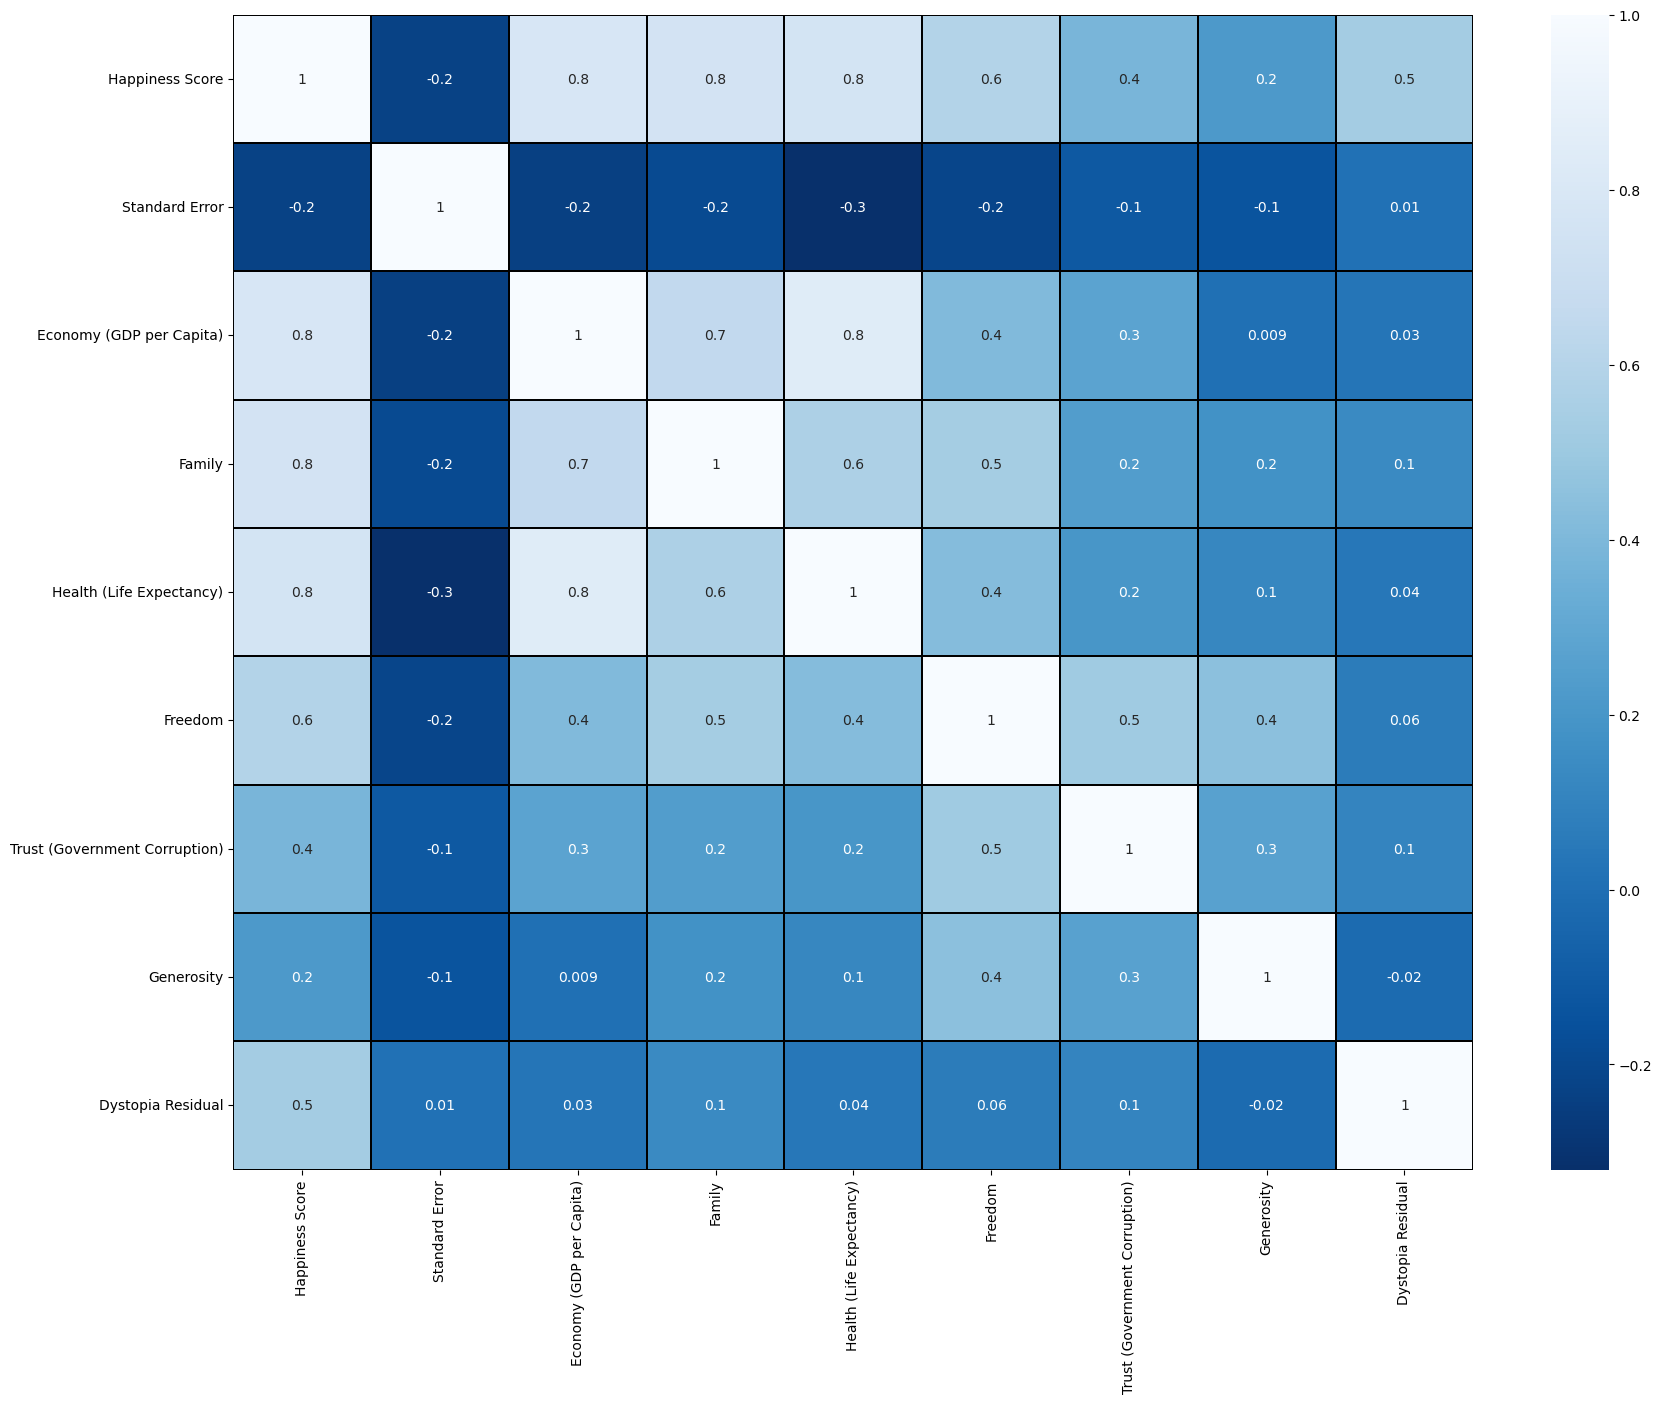

In [228]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidths=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

From the above plot we can see:
The columns Economy,Health,Family and Freedom are highly coorelated with Happiness Score
Among the features Economy and Health ,Economy and Family are correlated with each other

In [229]:
cor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.783572
Health (Life Expectancy)         0.759114
Family                           0.752671
Freedom                          0.592423
Dystopia Residual                0.527450
Trust (Government Corruption)    0.385794
Generosity                       0.217238
Standard Error                  -0.230049
Name: Happiness Score, dtype: float64

We can see positive and negative correlated features with the target

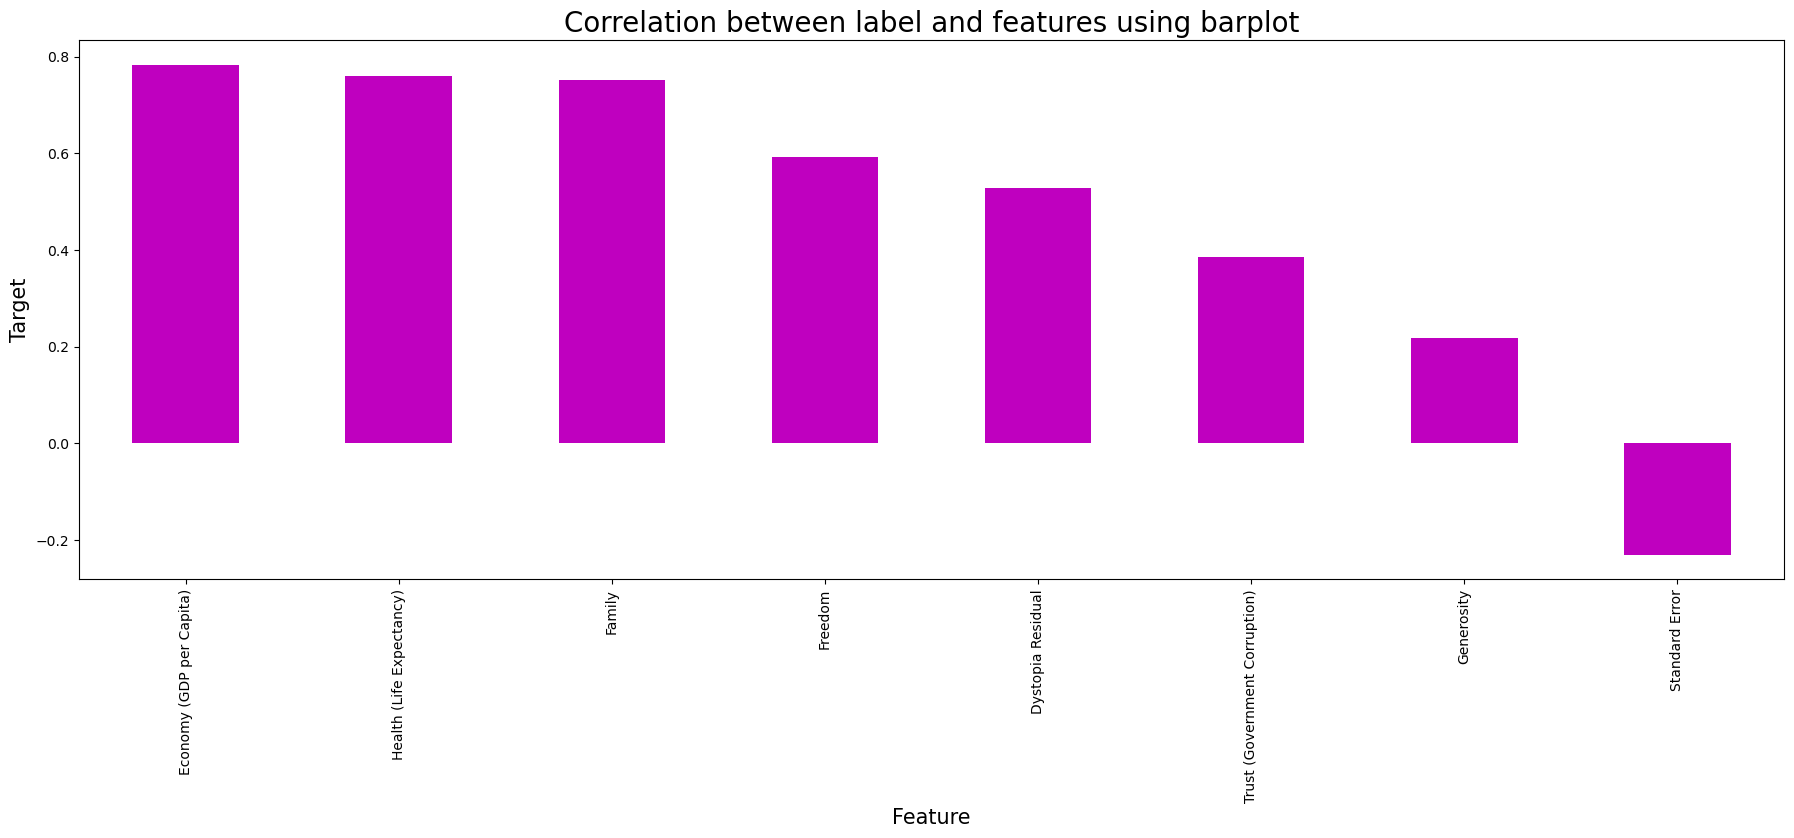

In [230]:
plt.figure(figsize=(22,7))
cor['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind="bar",color="m")
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above plot it is clear that Trust and Generosity are less corrleated with target and Standard Error is very very less correlated with the target wheras other columns are highly corrleated with the target

In [231]:
x=df1.drop('Happiness Score',axis=1)
y=df1['Happiness Score']

In [232]:
x.shape

(149, 8)

In [233]:
y.shape

(149,)

In [234]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030


In [235]:
y.head()

0    1.825912
1    1.806250
2    1.780485
3    1.776690
4    1.704342
Name: Happiness Score, dtype: float64

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x 

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.133581,Standard Error
1,4.677177,Economy (GDP per Capita)
2,2.131671,Family
3,3.919041,Health (Life Expectancy)
4,2.131249,Freedom
5,1.446073,Trust (Government Corruption)
6,1.374632,Generosity
7,1.046013,Dystopia Residual


We have hardly any multicollinearity as all the values of VIF are in the acceptable Range

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [241]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  0.9929932948608665 on Random_state  189


In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=maxRS)

In [245]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred1=LR.predict(x_test)
pred2=LR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred1))
print('R2_score on training data: ',r2_score(y_train,pred2)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred1))
print('Mean Squared Error: ',mean_squared_error(y_test,pred1))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred1)))

R2_score for test data:  0.9929932948608665
R2_score on training data:  98.52719395714752
Mean Absolute Error:  0.06919247307302603
Mean Squared Error:  0.006735835891046227
Root Mean Squared Error:  0.08207213833601648


In [246]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred3=RFR.predict(x_test)
pred4=RFR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred3))
print('R2_score on training data: ',r2_score(y_train,pred4)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred3))
print('Mean Squared Error: ',mean_squared_error(y_test,pred3))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred3)))

R2_score for test data:  0.8992658097366952
R2_score on training data:  98.52594378919333
Mean Absolute Error:  0.23899962881323214
Mean Squared Error:  0.09683994984195445
Root Mean Squared Error:  0.3111911789269652


In [247]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred5=knn.predict(x_test)
pred6=knn.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred5))
print('R2_score on training data: ',r2_score(y_train,pred6)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred5))
print('Mean Squared Error: ',mean_squared_error(y_test,pred5))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred5)))

R2_score for test data:  0.9064406953011976
R2_score on training data:  92.20939371212154
Mean Absolute Error:  0.22094158836921862
Mean Squared Error:  0.08994243514141402
Root Mean Squared Error:  0.2999040432228516


In [248]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred7=DTR.predict(x_test)
pred8=DTR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred7))
print('R2_score on training data: ',r2_score(y_train,pred8)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred7))
print('Mean Squared Error: ',mean_squared_error(y_test,pred7))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred7)))

R2_score for test data:  0.7489945859063586
R2_score on training data:  100.0
Mean Absolute Error:  0.3901577178147867
Mean Squared Error:  0.24130190203893334
Root Mean Squared Error:  0.49122489965283045


In [249]:
svr=SVR()
svr.fit(x_train,y_train)
pred9=svr.predict(x_test)
pred10=svr.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred9))
print('R2_score on training data: ',r2_score(y_train,pred10)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred9))
print('Mean Squared Error: ',mean_squared_error(y_test,pred9))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred9)))

R2_score for test data:  0.9346995393807248
R2_score on training data:  98.16782933957907
Mean Absolute Error:  0.18150499380914795
Mean Squared Error:  0.06277603775339734
Root Mean Squared Error:  0.250551467274485


In [257]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred1)-score.mean()))

[-0.02485023  0.73440923  0.5107255   0.71644238  0.43497902]
0.4743411808897421
Difference between R2 score and cross validation score is:  0.5186521139711244


In [258]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred3)-score1.mean()))

[-8.26030516 -1.20202405 -0.64890449 -1.63784662 -5.38627876]
-3.427071817566702
Difference between R2 score and cross validation score is:  4.326337627303397


In [259]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred5)-score2.mean()))

[-9.70491918 -3.70394624 -1.83504086 -7.00002521 -5.01791241]
-5.45236878198408
Difference between R2 score and cross validation score is:  6.358809477285278


In [260]:
score3=cross_val_score(DTR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred7)-score3.mean()))

[ -6.25875009  -9.25202138  -5.63669536 -12.44173263  -5.95002509]
-7.9078449093952985
Difference between R2 score and cross validation score is:  8.656839495301657


In [261]:
score4=cross_val_score(svr,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred9)-score4.mean()))

[-14.09124321   0.33322222   0.67979611  -0.03696683  -4.13951891]
-3.450942124259607
Difference between R2 score and cross validation score is:  4.385641663640332


From the above we can say that Linear Regressor is working best as it has minimum difference between r2 and cross_val_score so I choose Linear Regression as the best working Model

In [262]:
Param={'fit_intercept':[True,False],'positive':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
GSCV=GridSearchCV(LinearRegression(),Param,cv=5)

In [265]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'positive': [True, False]})

In [266]:
GSCV.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}

In [267]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1, positive=True)
CLassifer=Final_model.fit(x_train,y_train)
lr_pred=Final_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred)
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 99.29932948608666


In [268]:
import joblib
joblib.dump(Final_model, "Health_Report.pkl")

['Health_Report.pkl']

In [269]:
model = joblib.load("Health_Report.pkl")
prediction=Final_model.predict(x_test)
prediction

array([ 0.09948436, -0.42944253,  0.40139188, -0.29788269, -1.32206609,
       -0.50812829,  1.17173021,  0.04734181, -1.43794504, -0.6144688 ,
       -1.51382225,  0.69146332, -0.69950505, -0.45914269, -0.75750842,
       -0.51076387,  1.52010947,  1.00754037, -0.89660128,  0.52770526,
       -0.83628493,  1.68828216,  1.82524485, -0.10167598, -0.70086333,
        0.58995291,  0.062183  ,  0.31030316, -1.28917807,  1.7058216 ,
        1.77173868, -0.43068935,  1.28160728,  1.37432584,  0.83366072,
        1.20784601,  1.41593217, -0.29004188,  1.79881914,  0.24254476,
       -1.22029316, -0.66019903, -0.68519143,  1.04271303,  0.60571161])

In [270]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0.099484,0.092117
1,-0.429443,-0.330261
2,0.401392,0.408602
3,-0.297883,-0.222186
4,-1.322066,-1.405347
5,-0.508128,-0.494762
6,1.171730,1.032239
7,0.047342,0.051704
8,-1.437945,-1.524493
9,-0.614469,-0.543538


In [271]:
conclusion=pd.DataFrame([Final_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predicted,0.099484,-0.429443,0.401392,-0.297883,-1.322066,-0.508128,1.171730,0.047342,-1.437945,-0.614469,...,1.207846,1.415932,-0.290042,1.798819,0.242545,-1.220293,-0.660199,-0.685191,1.042713,0.605712
Original,0.092117,-0.330261,0.408602,-0.222186,-1.405347,-0.494762,1.032239,0.051704,-1.524493,-0.543538,...,1.267503,1.330243,-0.250947,1.704342,0.306586,-1.298254,-0.646723,-0.641876,0.975029,0.538715
